In [ ]:
# default_exp bap_multinomial_logistic_regression

# bap_multinomial_logistic_regression

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az
from scipy.special import expit as logistic
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

RANDOM_SEED = 123

### The IRIS Dataset

In [ ]:
iris = pd.read_csv("data/iris.csv")
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-3]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0)) / x_s.std(axis=0)
n_features = x_s.shape[1]
n_labels = len(np.unique(y_s))
n_features, n_labels

(2, 3)

### Model

In [ ]:
with pm.Model() as mnl_model:
    α = pm.Normal('α', mu=0, sd=10, shape=3)
    β = pm.Normal('β', mu=0, sd=10, shape=(n_features,3))
    μ = pm.Deterministic('μ', α + pm.math.dot(x_s, β))
    θ = tt.nnet.softmax(μ)
    
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_s = pm.sample(1000, chains=1)

/opt/conda/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [β, α]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 54 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8bc28b10>,
      dtype=object)

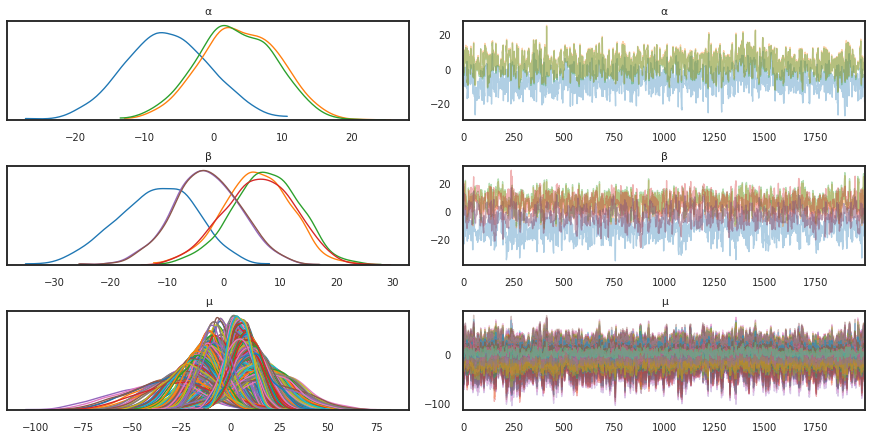

In [ ]:
pm.traceplot(trace_s)

/opt/conda/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8f80d950>],
      dtype=object)

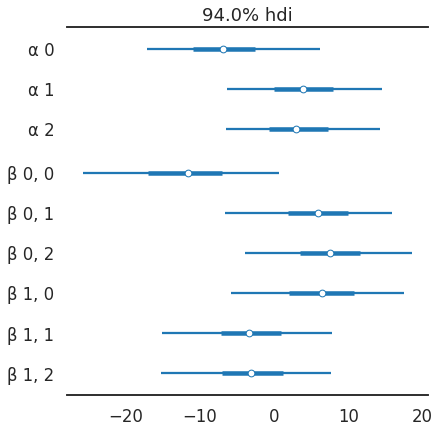

In [ ]:
az.plot_forest(trace_s, var_names=['α', 'β'])

### Prediction

In [ ]:
data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point) / np.sum(np.exp(point), axis=0) for point in data_pred]
f'{np.sum(y_s == np.argmax(y_pred, axis=1)) / len(y_s):.2f}'

'0.83'

In [ ]:
x_s.shape, type(x_s)

((150, 2), numpy.ndarray)

### Fixed extra parameters

In [ ]:
with pm.Model() as model_sf:
    α = pm.Normal('α', mu=0, sd=10, shape=2)
    β = pm.Normal('β', mu=0, sd=10, shape=(n_features,2))
    α_f = tt.concatenate([[0] ,α])
    β_f = tt.concatenate([np.zeros((n_features,1)) , β], axis=1)
    μ = pm.Deterministic('μ', α_f + pm.math.dot(x_s, β_f))
    #breakpoint()
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_sf = pm.sample(1000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/conda/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Sequential sampling (1 chains in 1 job)
NUTS: [β, α]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
data_pred = trace_sf['μ'].mean(0)
y_pred = [np.exp(point) / np.sum(np.exp(point), axis=0) for point in data_pred]
f'{np.sum(y_s == np.argmax(y_pred, axis=1)) / len(y_s):.2f}'

'0.83'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda94d023d0>,
      dtype=object)

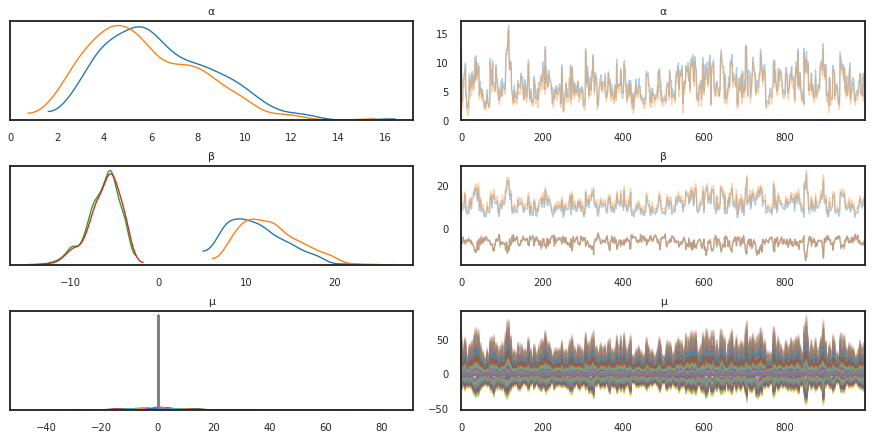

In [ ]:
pm.traceplot(trace_sf)

In [ ]:
np.random.seed(1)

with pm.Model() as mnl_model:
    α = pm.Normal('α', mu=0, sd=10, shape=3)
    β = pm.Normal('β', mu=0, sd=10, shape=(n_features,3))
    μ = pm.Deterministic('μ', α + pm.math.dot(x_s, β))
    θ = tt.nnet.softmax(μ)
    
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_s = pm.sample(1000, chains=1)

/opt/conda/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [β, α]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 29 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
az.summary(trace_s, var_names=['α', 'β'])

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shap

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α[0],-7.064,6.286,-19.127,4.071,0.388,0.300,263.0,220.0,273.0,243.0,NaN
α[1],3.386,5.552,-6.780,13.618,0.376,0.266,218.0,218.0,213.0,287.0,NaN
α[2],2.679,5.547,-7.692,12.749,0.369,0.262,225.0,225.0,223.0,409.0,NaN
"β[0,0]",-12.231,6.475,-23.111,0.939,0.359,0.254,325.0,324.0,327.0,378.0,NaN
"β[0,1]",5.233,5.884,-4.837,16.316,0.392,0.278,225.0,225.0,225.0,381.0,NaN
"β[0,2]",6.876,5.896,-3.389,17.861,0.393,0.278,225.0,225.0,226.0,348.0,NaN
"β[1,0]",6.286,6.155,-4.204,19.517,0.433,0.307,202.0,202.0,201.0,304.0,NaN
"β[1,1]",-2.876,5.656,-13.520,7.390,0.377,0.270,225.0,220.0,227.0,299.0,NaN
"β[1,2]",-2.687,5.655,-13.328,7.625,0.376,0.267,226.0,225.0,227.0,298.0,NaN


In [ ]:
np.random.seed(1)
with pm.Model() as mnl_model:
    α_0 = pm.Normal('α_0', mu=0, sd=10)
    α_1 = pm.Normal('α_1', mu=0, sd=10)
    α_2 = pm.Normal('α_2', mu=0, sd=10)
    
    β_0 = pm.Normal('β_0', mu=0, sd=10, shape=(n_features,1))
    β_1 = pm.Normal('β_1', mu=0, sd=10, shape=(n_features,1))
    β_2 = pm.Normal('β_2', mu=0, sd=10, shape=(n_features,1))
    
    μ_0 = α_0 + pm.math.dot(x_s, β_0)
    μ_1 = α_1 + pm.math.dot(x_s, β_1)
    μ_2 = α_2 + pm.math.dot(x_s, β_2)
    
    μ = tt.concatenate([μ_0, μ_1, μ_2], axis=1)
    #breakpoint()
    #μ = pm.Deterministic('μ', μ)
    
    θ = tt.nnet.softmax(μ)
    
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_s = pm.sample(1000, chains=1)

/opt/conda/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [β_2, β_1, β_0, α_2, α_1, α_0]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 43 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [ ]:
az.summary(trace_s)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shap

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α_0,-7.042,6.508,-19.217,4.849,0.429,0.304,230.0,230.0,231.0,351.0,NaN
α_1,3.832,5.668,-6.142,15.241,0.353,0.250,258.0,258.0,254.0,355.0,NaN
α_2,3.109,5.669,-7.118,14.329,0.354,0.251,256.0,256.0,254.0,355.0,NaN
"β_0[0,0]",-12.974,6.843,-24.952,0.079,0.378,0.267,328.0,328.0,328.0,448.0,NaN
"β_0[1,0]",6.266,6.049,-4.012,19.129,0.343,0.273,311.0,247.0,315.0,244.0,NaN
"β_1[0,0]",4.989,6.112,-6.324,15.891,0.356,0.252,296.0,296.0,294.0,328.0,NaN
"β_1[1,0]",-3.064,5.714,-14.487,7.033,0.318,0.225,323.0,323.0,324.0,502.0,NaN
"β_2[0,0]",6.636,6.104,-4.155,18.041,0.354,0.251,297.0,297.0,296.0,386.0,NaN
"β_2[1,0]",-2.881,5.710,-14.112,7.307,0.318,0.225,322.0,322.0,323.0,466.0,NaN


In [ ]:
import numpy as np
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[11,12,13],[14,15,16],[17,18,19]])
np.column_stack((a,b))

array([[ 1,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16],
       [ 7,  8,  9, 17, 18, 19]])

In [ ]:
pm.math.dot(a,b).eval()

array([[ 90,  96, 102],
       [216, 231, 246],
       [342, 366, 390]])

In [ ]:
pm.math.dot(a,b[:,0]).eval()

array([ 90, 216, 342])

In [ ]:
a.dot(b)

array([[ 90,  96, 102],
       [216, 231, 246],
       [342, 366, 390]])

In [ ]:
np.dot(a,b)

array([[ 90,  96, 102],
       [216, 231, 246],
       [342, 366, 390]])

In [ ]:
import theano.tensor as T
test = T.concatenate([a,b], axis=1)
test.eval()

array([[ 1,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16],
       [ 7,  8,  9, 17, 18, 19]])

In [ ]:
test.shape.eval()

array([3, 6])

In [ ]:
test.reshape((-1,3)).shape.eval()

array([6, 3])

In [ ]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[11,12,13],[14,15,16],[17,18,19]])


In [ ]:
a.shape,  b.shape

((2, 3), (3, 3))

In [ ]:
a.dot(b)

array([[ 90,  96, 102],
       [216, 231, 246]])

In [ ]:
b[:,0].shape

(3,)

In [ ]:
t0 = a.dot(b[:,0])
t1 = a.dot(b[:,1])
t2 = a.dot(b[:,2])

In [ ]:
np.stack([t0, t1, t2], axis=1)

array([[ 90,  96, 102],
       [216, 231, 246]])

In [ ]:
a.dot(b[:,1])

array([ 96, 231])

In [ ]:
a.dot(b[:,2])

array([102, 246])